# 0. Load && Test DATA

In [179]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
content = pd.read_csv('train.csv')

In [5]:
content = content.dropna()

In [6]:
age_with_fares = content[
    (content['Age'] > 22 ) & (content['Fare']<400) & (content['Fare']>130)
]

In [23]:
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']

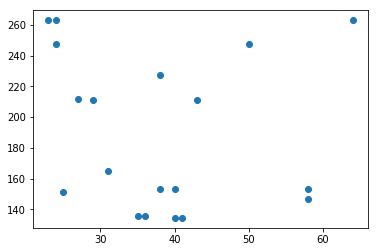

In [24]:
plt.scatter(sub_age, sub_fare)

In [25]:
plt.show()

In [26]:
# def func(ages, k, b) :return [k * age + b for age in ages]
def func(ages, k, b) :return k * ages + b 

In [41]:
def loss(ys, yhats):
    """
    :param y : the real fares
    :param yhat: the estimated fares
    :return : how good is the estimate fares
    """
    
    return np.mean(np.abs(ys-yhats))
#     return [np.mean(np.abs(y-yhat)) for y in ys for yhat in yhats]

In [30]:
k_hat = random.randint(-10,10)
b_hat = random.randint(10, 10)

In [33]:
# while True:
estimated_fares = func(sub_age, k_hat, b_hat)
performance = loss(ys=sub_fare, yhats=estimated_fares)
print(performance)

[256.1754315789474]


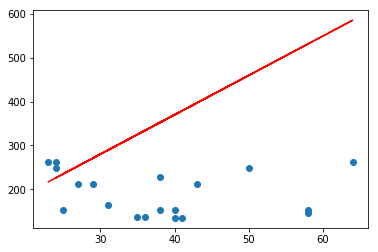

In [18]:
plt.scatter(sub_age, sub_fare)
plt.plot(sub_age, estimated_fares, c='r')

# 1.Random Optimization 

In [32]:
best_k, best_b = None, None

In [115]:
min_error_rate = float('inf')

In [116]:
epoch = 1000
nlist = range(1, epoch)

In [117]:
performances = []
best_p =[min_error_rate]

随机更新k和b，循环1000次

In [118]:
while epoch > 0 :
    k_hat = random.randint(-10,10)
    b_hat = random.randint(-10, 10)
    estimated_fares = func(sub_age, k_hat, b_hat)
    performance = loss(ys=sub_fare, yhats=estimated_fares)
    performances.append(performance)
    if performance < min_error_rate :
        min_error_rate = performance
        best_p.append(min_error_rate)
        best_k, best_b = k_hat, b_hat
    epoch = epoch - 1

In [119]:
performances[:10]

[371.4912210526315,
 173.30044210526313,
 453.701747368421,
 61.84123157894739,
 84.92017894736841,
 82.65965263157895,
 527.9122736842105,
 82.92281052631579,
 63.41623157894738,
 83.44912631578947]

当前最好的结果：

In [120]:
best_p, best_k, best_b

([inf,
  371.4912210526315,
  173.30044210526313,
  61.84123157894739,
  61.26228421052633,
  61.20965263157896],
 4,
 10)

这1000次每次的误差：可以看出波动很大，基本靠蒙

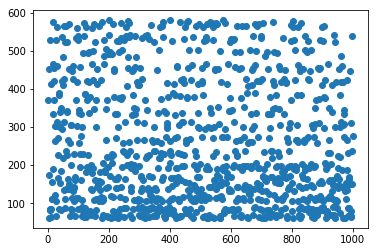

In [121]:
nlist = range(1, 1+len(performances))
plt.scatter(nlist, performances)

最好误差的变化：

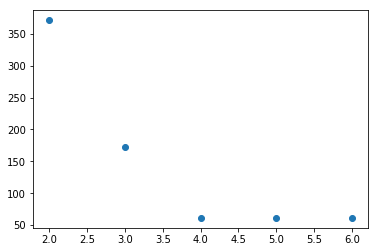

In [123]:
nlist = range(1, 1+len(best_p))
plt.scatter(nlist, best_p)

查看和数据拟合的结果：

In [126]:
estimated_fares = func(sub_age, best_k, best_b)

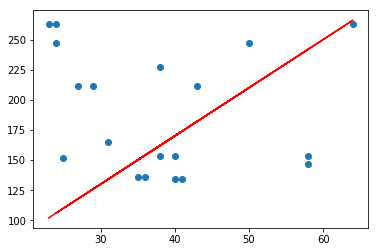

In [127]:
plt.scatter(sub_age, sub_fare)
plt.plot(sub_age, estimated_fares, c='r')

实数域测试：

In [141]:
epoch = 1000
performances = []
min_error_rate = float('inf')
best_p =[min_error_rate]

In [142]:
while epoch > 0 :
    k_hat = random.random() * 20 - 10
    b_hat = random.random() * 20 - 10
    estimated_fares = func(sub_age, k_hat, b_hat)
    performance = loss(ys=sub_fare, yhats=estimated_fares)
    performances.append(performance)
    if performance < min_error_rate :
        min_error_rate = performance
#         best_p.append(min_error_rate)
        best_k, best_b = k_hat, b_hat
    best_p.append(min_error_rate)
    epoch = epoch - 1

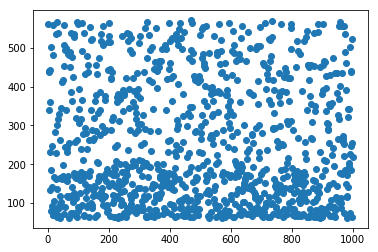

In [143]:
nlist = range(1, 1+len(performances))
plt.scatter(nlist, performances)

In [146]:
# best_p, best_k, best_b

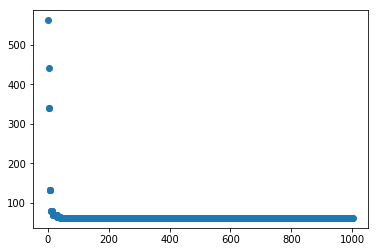

In [147]:
nlist = range(1, 1+len(best_p))
plt.scatter(nlist, best_p)

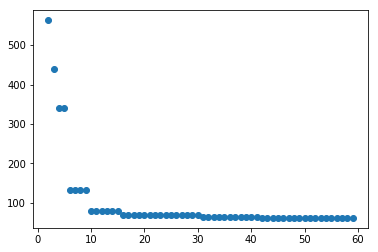

In [150]:
nlist = range(1, 60)
plt.scatter(nlist, best_p[:59])

In [151]:
estimated_fares = func(sub_age, best_k, best_b)

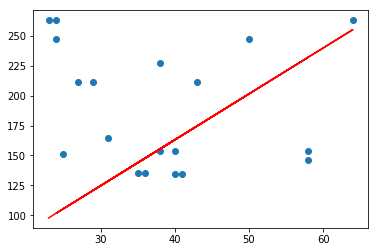

In [152]:
plt.scatter(sub_age, sub_fare)
plt.plot(sub_age, estimated_fares, c='r')

大约在42左右可以得到最优解，但是错误率本身从未收敛

# 2.Supervised Direction Optimization 

In [154]:
epoch = 1000
performances = []
min_error_rate = float('inf')
best_p =[min_error_rate]
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10
step = 0.5
best_k, best_b = 0, 0
k_direct, b_direct = 1, 1

In [156]:
while epoch > 0 :
    k_hat = best_k + k_direct * step
    b_hat = best_b + b_direct * step
    estimated_fares = func(sub_age, k_hat, b_hat)
    performance = loss(ys=sub_fare, yhats=estimated_fares)
    performances.append(performance)
    if performance < min_error_rate :
        min_error_rate = performance
        best_k, best_b = k_hat, b_hat
    else:
        k_direct, b_direct = -k_direct, -b_direct
    best_p.append(min_error_rate)
    epoch = epoch - 1

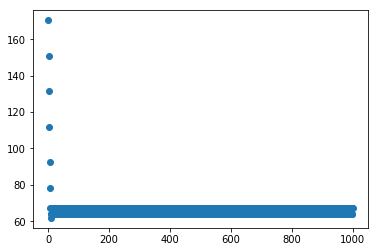

In [157]:
nlist = range(1, 1+len(performances))
plt.scatter(nlist, performances)

明显这里收敛了

In [160]:
best_p[990:], best_k, best_b

([61.84123157894739,
  61.84123157894739,
  61.84123157894739,
  61.84123157894739,
  61.84123157894739,
  61.84123157894739,
  61.84123157894739,
  61.84123157894739,
  61.84123157894739,
  61.84123157894739,
  61.84123157894739],
 4.0,
 4.0)

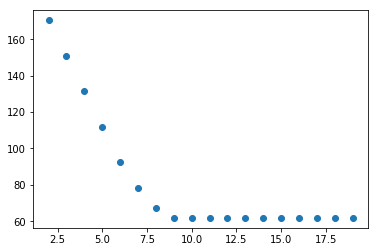

In [162]:
nlist = range(1, 20)
plt.scatter(nlist, best_p[:19])

可以看出收敛更快，更平滑了，第9次就差不多了。下面调整步长试试

In [164]:
epoch = 100
performances = []
min_error_rate = float('inf')
best_p =[min_error_rate]
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10
step = 0.1 
best_k, best_b = 0, 0
k_direct, b_direct = 1, 1

In [165]:
while epoch > 0 :
    k_hat = best_k + k_direct * step
    b_hat = best_b + b_direct * step
    estimated_fares = func(sub_age, k_hat, b_hat)
    performance = loss(ys=sub_fare, yhats=estimated_fares)
    performances.append(performance)
    if performance < min_error_rate :
        min_error_rate = performance
        best_k, best_b = k_hat, b_hat
    else:
        k_direct, b_direct = -k_direct, -b_direct
    best_p.append(min_error_rate)
    epoch = epoch - 1

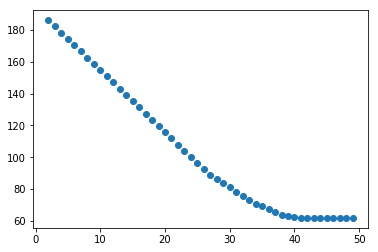

In [167]:
nlist = range(1, 50)
plt.scatter(nlist, best_p[:49])

步长调小后，收敛更加平滑，但是也变得缓慢了。

# 3.Gradient Descent

In [198]:
epoch = 1000
performances = []
min_error_rate = float('inf')
best_p =[min_error_rate]
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10
step = 0.5
learning_rate = 0.001
best_k, best_b = 0, 0
k_direct, b_direct = 1, 1

In [180]:
def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    
    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])


In [182]:
def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    
    return np.mean([a * -1 for a in abs_values])

In [199]:
while epoch > 0 :
#     k_delta = -1 * learning_rate * derivate_k(sub_fare, estimated_fares, sub_age)
#     b_delta = -1 * learning_rate * derivate_b(sub_fare, estimated_fares)
    
#     k_hat += k_delta
#     b_hat += b_dalta
    
#     k_hat = best_k + k_direct * step
#     b_hat = best_b + b_direct * step
    estimated_fares = func(sub_age, k_hat, b_hat)
    performance = loss(ys=sub_fare, yhats=estimated_fares)
    performances.append(performance)
    if performance < min_error_rate :
        min_error_rate = performance
        best_k, best_b = k_hat, b_hat


    best_p.append(min_error_rate)
    
    k_delta = -1 * learning_rate * derivate_k(sub_fare, estimated_fares, sub_age)
    b_delta = -1 * learning_rate * derivate_b(sub_fare, estimated_fares)
    k_hat += k_delta
    b_hat += b_delta
    
    epoch = epoch - 1

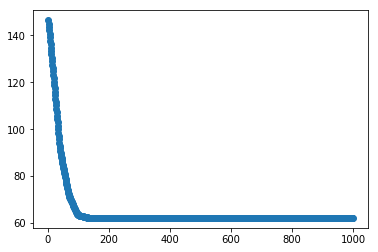

In [200]:
nlist = range(1, 1000)
plt.scatter(nlist, best_p[:999])

可以看出收敛的曲线特别平滑。因为学习率取的比较低，所以收敛不是很快。

In [202]:
epoch = 1000
performances = []
min_error_rate = float('inf')
best_p =[min_error_rate]
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10
step = 0.5
learning_rate = 0.01
best_k, best_b = 0, 0
k_direct, b_direct = 1, 1

In [203]:
while epoch > 0 :
#     k_delta = -1 * learning_rate * derivate_k(sub_fare, estimated_fares, sub_age)
#     b_delta = -1 * learning_rate * derivate_b(sub_fare, estimated_fares)
    
#     k_hat += k_delta
#     b_hat += b_dalta
    
#     k_hat = best_k + k_direct * step
#     b_hat = best_b + b_direct * step
    estimated_fares = func(sub_age, k_hat, b_hat)
    performance = loss(ys=sub_fare, yhats=estimated_fares)
    performances.append(performance)
    if performance < min_error_rate :
        min_error_rate = performance
        best_k, best_b = k_hat, b_hat


    best_p.append(min_error_rate)
    
    k_delta = -1 * learning_rate * derivate_k(sub_fare, estimated_fares, sub_age)
    b_delta = -1 * learning_rate * derivate_b(sub_fare, estimated_fares)
    k_hat += k_delta
    b_hat += b_delta
    
    epoch = epoch - 1

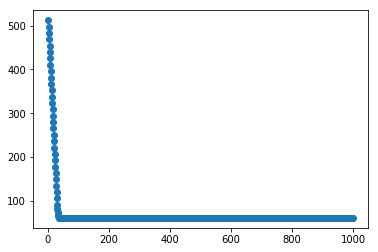

In [204]:
nlist = range(1, 1000)
plt.scatter(nlist, best_p[:999])

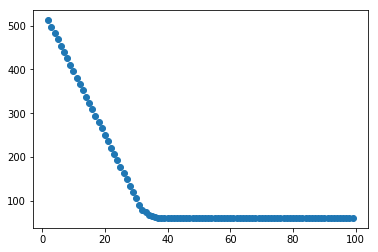

In [205]:
nlist = range(1, 100)
plt.scatter(nlist, best_p[:99])

大一点的学习率，收敛更快了。可以看出梯度下降的优化效果非常稳定，平滑